## Pre-processing the Dataset

In [4]:
import pandas as pd
import os
df=pd.read_csv("M25_DA_A2_Part2.csv")

In [5]:
#check for the datatype of each column
print(df.dtypes)
# print(df.info())

Campaign_ID                           object
Product_ID                            object
Budget                               float64
Clicks                                 int64
Conversions                            int64
Revenue_Generated                    float64
ROI                                  float64
Customer_ID                           object
Subscription_Tier                     object
Subscription_Length                    int64
Flash_Sale_ID                         object
Discount_Level                         int64
Units_Sold                             int64
Bundle_ID                             object
Bundle_Price                         float64
Customer_Satisfaction_Post_Refund      int64
Common_Keywords                       object
dtype: object


In [6]:
#check for null values
print(df.isnull().sum())
# print(df.head(5))

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64


In [7]:
# Count unique values per column
unique_counts = df.nunique().sort_values(ascending=False)

# Display the result
print("Unique values per column:\n")
print(unique_counts)

Unique values per column:

Campaign_ID                          10000
Product_ID                           10000
Customer_ID                          10000
Bundle_ID                            10000
Flash_Sale_ID                        10000
Revenue_Generated                     9997
Budget                                9995
Bundle_Price                          8977
Clicks                                4298
Conversions                            999
ROI                                    451
Units_Sold                             199
Discount_Level                          60
Subscription_Length                     35
Customer_Satisfaction_Post_Refund        4
Common_Keywords                          4
Subscription_Tier                        3
dtype: int64


Since there are no null values and all columns have the correct data types, no additional preprocessing is needed. We will drop the five columns that contain 10,000 unique values each, as they would not contribute to aggregation. Including them would still result in 10,000 rows, which goes against the purpose of aggregation.

In [8]:
#Dropping these columns from the dataset
df_gen = df.drop(columns=["Campaign_ID", "Product_ID", "Customer_ID", "Flash_Sale_ID", "Bundle_ID"])

## Attribute Oriented Induction

In [11]:
# Drop low-level identifiers
df_gen = df.drop(columns=["Campaign_ID", "Product_ID", "Customer_ID", "Flash_Sale_ID", "Bundle_ID"])

# Attribute Generalization (binning)
df_gen["Revenue_Level"] = pd.cut(df["Revenue_Generated"], bins=[-1, 30000, 70000, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Budget_Level"] = pd.cut(df["Budget"], bins=[-1, 20000, 40000, float("inf")], labels=["Low", "Medium", "High"])
df_gen["ROI_Level"] = pd.cut(df["ROI"], bins=[-1, 1, 2, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Bundle_Price_Level"] = pd.cut(df["Bundle_Price"], bins=[-1, 250, 400, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Subscription_Length_Group"] = pd.cut(df["Subscription_Length"], bins=[-1, 6, 18, float("inf")], labels=["Short", "Medium", "Long"])
df_gen["Discount_Level_Group"] = pd.cut(df["Discount_Level"], bins=[-1, 20, 40, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Units_Sold_Group"] = pd.cut(df["Units_Sold"], bins=[-1, 50, 100, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Satisfaction_Level"] = pd.cut(df["Customer_Satisfaction_Post_Refund"], bins=[0, 2, 3, 5], labels=["Low", "Medium", "High"])

# Remove the original numeric columns that were generalized
df_gen.drop(columns=[
    "Revenue_Generated", "Budget", "ROI", "Bundle_Price",
    "Subscription_Length", "Discount_Level", "Units_Sold",
    "Customer_Satisfaction_Post_Refund"
], inplace=True)

# Group by generalized attributes to extract characteristic rules
summary = df_gen.groupby([
    "Subscription_Tier",
    "Subscription_Length_Group",
    "Revenue_Level",
    "Budget_Level",
    "ROI_Level",
    "Bundle_Price_Level",
    "Discount_Level_Group",
    "Units_Sold_Group",
    "Satisfaction_Level",
    "Common_Keywords"
], observed=True).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Step 5: Save top 10 characteristic rules to CSV
summary.to_csv("AOI_1.csv", index=False)

This generalization still has 8536 rows, which is not a good generalization from 10k rows. Let's generalise few columns a little more.

In [12]:
df_gen["Revenue_Level"] = pd.cut(df["Revenue_Generated"], 
                                 bins=[-1, 50000, float("inf")], 
                                 labels=["Low", "High"])

df_gen["Budget_Level"] = pd.cut(df["Budget"], 
                                bins=[-1, 30000, float("inf")], 
                                labels=["Low", "High"])

df_gen["Bundle_Price_Level"] = pd.cut(df["Bundle_Price"], 
                                      bins=[-1, 300, float("inf")], 
                                      labels=["Low", "High"])

df_gen["ROI_Level"] = pd.cut(df["ROI"], 
                             bins=[-1, 1.5, float("inf")], 
                             labels=["Low", "High"])

df_gen["Subscription_Length_Group"] = pd.cut(df["Subscription_Length"], 
                                             bins=[-1, 12, float("inf")], 
                                             labels=["Short", "Long"])

# Step 3: Remove the original numeric columns that were generalized
df_gen.drop(columns=[
    "Revenue_Generated", "Budget", "ROI", "Bundle_Price",
    "Subscription_Length", "Discount_Level", "Units_Sold",
    "Customer_Satisfaction_Post_Refund"
], inplace=True, errors="ignore")

# Step 4: Group by generalized attributes to extract characteristic rules
summary = df_gen.groupby([
    "Subscription_Tier",
    "Subscription_Length_Group",
    "Revenue_Level",
    "Budget_Level",
    "ROI_Level",
    "Bundle_Price_Level",
    "Discount_Level_Group",
    "Units_Sold_Group",
    "Satisfaction_Level",
    "Common_Keywords"
], observed=True).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Step 5: Save top 10 characteristic rules to CSV
summary.to_csv("AOI_2.csv", index=False)

Still there are around 5000 rows, hence this is not a very good aggregation.

In [13]:
# Drop identifiers
df_gen = df.drop(columns=["Campaign_ID", "Product_ID", "Customer_ID", "Flash_Sale_ID", "Bundle_ID"])

# Coarser binning
df_gen["Revenue_Level"] = pd.cut(df["Revenue_Generated"], bins=[-1, 50000, float("inf")], labels=["Low", "High"])
df_gen["Budget_Level"] = pd.cut(df["Budget"], bins=[-1, 30000, float("inf")], labels=["Low", "High"])
df_gen["ROI_Level"] = pd.cut(df["ROI"], bins=[-1, 1.5, float("inf")], labels=["Low", "High"])
df_gen["Subscription_Length_Group"] = pd.cut(df["Subscription_Length"], bins=[-1, 12, float("inf")], labels=["Short", "Long"])
df_gen["Discount_Level_Group"] = pd.cut(df["Discount_Level"], bins=[-1, 30, float("inf")], labels=["Low", "High"])
df_gen["Satisfaction_Level"] = pd.cut(df["Customer_Satisfaction_Post_Refund"], bins=[0, 2, 5], labels=["Low", "High"])

# Drop detailed numeric columns
df_gen.drop(columns=[
    "Revenue_Generated", "Budget", "ROI", "Bundle_Price",
    "Subscription_Length", "Discount_Level", "Units_Sold",
    "Customer_Satisfaction_Post_Refund"
], inplace=True)

# Keep only core attributes (drop noisy columns like Common_Keywords, Units_Sold_Group, etc.)
summary = df_gen.groupby([
    "Subscription_Tier",
    "Subscription_Length_Group",
    "Revenue_Level",
    "ROI_Level",
    "Satisfaction_Level"
], observed=True).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Save generalized characteristic rules
summary.to_csv("AOI_3.csv", index=False)


This version of AOI produces around 50 rows but it leads to loss of valuable information.

In [14]:
# Step 1: Drop low-level identifiers
df_gen = df.drop(columns=["Campaign_ID", "Product_ID", "Customer_ID", "Flash_Sale_ID", "Bundle_ID"])

# Step 2: Attribute Generalization (binning)
df_gen["Revenue_Level"] = pd.cut(df["Revenue_Generated"], bins=[-1, 30000, 70000, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Budget_Level"] = pd.cut(df["Budget"], bins=[-1, 20000, 40000, float("inf")], labels=["Low", "Medium", "High"])
df_gen["ROI_Level"] = pd.cut(df["ROI"], bins=[-1, 1, 2, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Bundle_Price_Level"] = pd.cut(df["Bundle_Price"], bins=[-1, 250, 400, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Subscription_Length_Group"] = pd.cut(df["Subscription_Length"], bins=[-1, 6, 18, float("inf")], labels=["Short", "Medium", "Long"])
df_gen["Discount_Level_Group"] = pd.cut(df["Discount_Level"], bins=[-1, 20, 40, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Units_Sold_Group"] = pd.cut(df["Units_Sold"], bins=[-1, 50, 100, float("inf")], labels=["Low", "Medium", "High"])
df_gen["Satisfaction_Level"] = pd.cut(df["Customer_Satisfaction_Post_Refund"], bins=[0, 2, 3, 5], labels=["Low", "Medium", "High"])

# Step 3: Remove the original numeric columns that were generalized
df_gen.drop(columns=[
    "Revenue_Generated", "Budget", "ROI", "Bundle_Price",
    "Subscription_Length", "Discount_Level", "Units_Sold",
    "Customer_Satisfaction_Post_Refund"
], inplace=True)

# Step 4: Group by generalized attributes to extract characteristic rules
summary = df_gen.groupby([
    "Subscription_Tier",
    "Subscription_Length_Group",
    "Revenue_Level",
    "Budget_Level",
    "ROI_Level",
    "Bundle_Price_Level",
    "Discount_Level_Group",
    "Units_Sold_Group",
    "Satisfaction_Level",
    "Common_Keywords"
], observed=True).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Step 5: Save top 10 characteristic rules to CSV
summary.head(10).to_csv("Top_Characteristic_Rules.csv", index=False)

Took the top characteristic rules to do the analysis.

## BUC Algorithm Implementation

### IN-Memory implementaion

In [9]:
#Dropping these columns from the dataset
df = df.drop(columns=["Campaign_ID", "Product_ID", "Customer_ID", "Flash_Sale_ID", "Bundle_ID","Discount_Level","Bundle_Price","ROI"])

In [18]:


def buc_recursive_func(df, dimensions, agg_func='sum'):
    # BASE CASE 
    # no more dimensions left to group by, aggregate the measure columns
    if len(dimensions)==0:
        # Get only numeric columns for aggregation
        numeric_cols = df.select_dtypes(include=['number']).columns  #dtypes: tell data type of each column in dataframe
        if len(numeric_cols)==0:
            # If no numeric columns, just count rows
            result_df = pd.DataFrame({'count': [len(df)]})
        else:
            result_df = df[numeric_cols].agg(agg_func).to_frame().T  #.to_frame converts the pandas series into a dataframe, and .T transposes 
            #by transposing we have our aggregate columns at the top
            result_df['Frequency']=len(df)
        return [result_df]
    
    results = []
    dim = dimensions[0]  
    remaining_dim = dimensions[1:]

    grouped = df.groupby(dim, dropna=False)  # Keep NaN groups if any and creates a groupby object that will iterate over unique values of dim. Nan is treated as a separate group.
    
    # group by the dimensions we are currently having
    for val, group in grouped:  # FIXED: Use 'grouped' instead of df.groupby(dim)
        sub_results = buc_recursive_func(group, remaining_dim, agg_func)
        for r in sub_results:
            r = r.copy() #make a copy to avoid mutating
            r[dim] = val
            results.append(r)

    # Add aggregate with "All" like OLAP Cube
    sub_results = buc_recursive_func(df, remaining_dim, agg_func)
    for r in sub_results:
        r = r.copy()
        r[dim] = "ALL"  # FIXED: Use "ALL" instead of val
        results.append(r)

    return results

# Load your data
df = pd.read_csv("M25_DA_A2_Part2.csv")

dimensions = [
    "Subscription_Tier",
    "Subscription_Length",
    "Discount_Level"
    
]

measures = [
    "Budget",
    "Clicks",
    "Conversions",
    "Revenue_Generated",
    "Units_Sold",
    "Customer_Satisfaction_Post_Refund"    
]

# Check if all columns exist
missing_dims = [dim for dim in dimensions if dim not in df.columns]
missing_measures = [measure for measure in measures if measure not in df.columns]

if missing_dims:
    print(f"Warning: Missing dimension columns: {missing_dims}")
if missing_measures:
    print(f"Warning: Missing measure columns: {missing_measures}")

# Use only available columns
available_dimensions = [dim for dim in dimensions if dim in df.columns]
available_measures = [measure for measure in measures if measure in df.columns]

print(f"Dataset shape: {df.shape}")
print(f"Using {len(available_dimensions)} dimensions and {len(available_measures)} measures")

df_measures = df[available_dimensions + available_measures]

print("Generating BUC cube...")
cube = buc_recursive_func(df_measures, available_dimensions)

final_result = pd.concat(cube, ignore_index=True)
print(f"\nGenerated cube with {len(final_result)} rows")
final_result.to_csv("BUC_In.csv",index=False)
print("Saved the result to BUC_In.csv")

Dataset shape: (10000, 17)
Using 3 dimensions and 6 measures
Generating BUC cube...

Generated cube with 7472 rows
Saved the result to BUC_In.csv


### Out-Memory Implementation

In [24]:

def buc_oom(file_path, dimensions, measures, agg_func='sum', chunk_size=1000, output_dir='buc_temp'):
   
    # file_path: Path to CSV file
    # dimensions: List of dimension columns to group by recursively
    # measures: List of measure columns to aggregate
    # agg_func: Aggregation function ('sum' by default)
    # chunk_size: Number of rows to read per chunk
    # output_dir: Directory to store temporary files
    
   
    #Returns pandas DataFrame with aggregated cube results
    
     
    os.makedirs(output_dir, exist_ok=True)  #creates output directory if it doesnot exists

    # Base case: no more dimensions to group by
    if len(dimensions) == 0:
        agg_results = None
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            numeric_cols = chunk[measures].select_dtypes(include=['number']).columns
            if agg_results is None:
                agg_results = chunk[numeric_cols].agg(agg_func)
            else:
                agg_results += chunk[numeric_cols].agg(agg_func)
        return pd.DataFrame([agg_results])

    dim = dimensions[0]
    remaining_dims = dimensions[1:]

    # Process chunks to group by current dimension
    chunk_agg_files = []
    for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):
        grouped = chunk.groupby(dim, dropna=False)[measures].agg(agg_func).reset_index()
        chunk_file = os.path.join(output_dir, f"chunk_{dim}_{i}.csv")
        grouped.to_csv(chunk_file, index=False)
        chunk_agg_files.append(chunk_file)

    # Merge partial aggregations from all chunk files
    merged = None
    for f in chunk_agg_files:
        df_part = pd.read_csv(f)
        if merged is None:
            merged = df_part
        else:
            merged = pd.concat([merged, df_part])
            merged = merged.groupby(dim, dropna=False)[measures].agg(agg_func).reset_index()
        os.remove(f)  # clean up chunk file

    results = []  

    # For each unique value in this dimension, filter original data and recurse
    for val in merged[dim].unique():
        filtered_file = os.path.join(output_dir, f"filtered_{dim}_{val}.csv")
        with open(filtered_file, 'w') as f_out:
            header_written = False
            for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                filtered_chunk = chunk[chunk[dim] == val]
                if not filtered_chunk.empty:
                    filtered_chunk.to_csv(f_out, index=False, header=not header_written)
                    header_written = True

        sub_cube = buc_oom(filtered_file, remaining_dims, measures, agg_func, chunk_size, output_dir)
        sub_cube[dim] = val
        results.append(sub_cube)
        os.remove(filtered_file)

    # Also compute 'ALL' aggregate (rollup) for this dimension by recursing on full original file
    all_cube = buc_oom(file_path, remaining_dims, measures, agg_func, chunk_size, output_dir)
    all_cube[dim] = "ALL"
    results.append(all_cube)

    # Concatenate and return
    final_df = pd.concat(results, ignore_index=True)
    return final_df

file_path = "M25_DA_A2_Part2.csv"

dimensions = [
    "Subscription_Tier",
    "Subscription_Length",
    "Discount_Level",
]

measures = [
    "Budget",
    "Clicks",
    "Conversions",
    "Revenue_Generated",
    "Units_Sold",
    "Customer_Satisfaction_Post_Refund"
]

print(f"Dataset shape: {df.shape}")
print(f"Using {len(available_dimensions)} dimensions and {len(available_measures)} measures")

print("Running out-of-memory BUC cube...")
final_cube = buc_oom(file_path, dimensions, measures, chunk_size=1000)
print(f"Final cube shape: {final_cube.shape}")

final_result.to_csv("BUC_Out.csv",index=False)
print("Saved the result to BUC_Out.csv")


Dataset shape: (10000, 17)
Using 3 dimensions and 6 measures
Running out-of-memory BUC cube...
Final cube shape: (7472, 9)
Saved the result to BUC_Out.csv


## Performance Analysis

### 1. A plot of minsup v/s runtime, keeping allotted memory fixed.

minsup=0, runtime=40.71s, result_shape=(7472, 10)
minsup=2, runtime=31.10s, result_shape=(5350, 10)
minsup=5, runtime=15.06s, result_shape=(1621, 10)
minsup=10, runtime=9.10s, result_shape=(438, 10)
minsup=20, runtime=9.32s, result_shape=(384, 10)
minsup=50, runtime=8.71s, result_shape=(346, 10)
minsup=100, runtime=5.00s, result_shape=(132, 10)
minsup=200, runtime=2.04s, result_shape=(39, 10)
minsup=500, runtime=0.67s, result_shape=(4, 10)
minsup=1000, runtime=0.63s, result_shape=(4, 10)


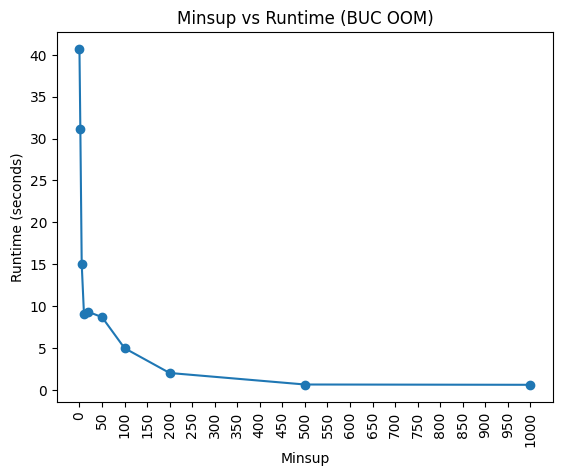

In [30]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

#minsup pruning in out-memory implementation

def buc_p1(file_path, dimensions, measures, agg_func='sum', chunk_size=1000, output_dir='buc_temp', minsup=0):
  
    os.makedirs(output_dir, exist_ok=True)

    # Base case
    if len(dimensions) == 0:
        agg_results = None
        total_count = 0
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            numeric_cols = chunk[measures].select_dtypes(include=['number']).columns
            if agg_results is None:
                agg_results = chunk[numeric_cols].agg(agg_func)
            else:
                agg_results += chunk[numeric_cols].agg(agg_func)
            total_count += len(chunk)
        if total_count < minsup:
            return pd.DataFrame()
        result = pd.DataFrame([agg_results])
        result["frequency"] = total_count
        return result

    dim = dimensions[0]
    remaining_dims = dimensions[1:]

    # Process chunks to group by current dimension
    chunk_agg_files = []
    for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):
        grouped = chunk.groupby(dim, dropna=False)[measures].agg(agg_func)
        grouped["frequency"] = chunk.groupby(dim, dropna=False).size()
        grouped = grouped.reset_index()
        chunk_file = os.path.join(output_dir, f"chunk_{dim}_{i}.csv")
        grouped.to_csv(chunk_file, index=False)
        chunk_agg_files.append(chunk_file)

    # Merge partial aggregations
    merged = None
    for f in chunk_agg_files:
        df_part = pd.read_csv(f)
        if merged is None:
            merged = df_part
        else:
            merged = pd.concat([merged, df_part])
            merged = merged.groupby(dim, dropna=False).agg({**{m: agg_func for m in measures}, "frequency": "sum"}).reset_index()
        os.remove(f)

    results = []

    # Recurse for each value (only if meets minsup)
    for _, row in merged.iterrows():
        if row["frequency"] >= minsup:
            val = row[dim]
            filtered_file = os.path.join(output_dir, f"filtered_{dim}_{val}.csv")
            with open(filtered_file, 'w') as f_out:
                header_written = False
                for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                    filtered_chunk = chunk[chunk[dim] == val]
                    if not filtered_chunk.empty:
                        filtered_chunk.to_csv(f_out, index=False, header=not header_written)
                        header_written = True

            sub_cube = buc_oom(filtered_file, remaining_dims, measures, agg_func, chunk_size, output_dir, minsup)
            if not sub_cube.empty:
                sub_cube[dim] = val
                results.append(sub_cube)
            os.remove(filtered_file)

    # Compute 'ALL' aggregate
    all_cube = buc_p1(file_path, remaining_dims, measures, agg_func, chunk_size, output_dir, minsup)
    if not all_cube.empty:
        all_cube[dim] = "ALL"
        results.append(all_cube)

    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()


#minsup vs runtime
def experiment_minsup(file_path, dimensions, measures, minsup_values, chunk_size=1000):
    runtimes = []
    for minsup in minsup_values:
        start = time.time()
        final_cube = buc_p1(file_path, dimensions, measures, chunk_size=chunk_size, minsup=minsup)
        end = time.time()
        runtimes.append(end - start)
        print(f"minsup={minsup}, runtime={end-start:.2f}s, result_shape={final_cube.shape}")
    return runtimes

file_path = "M25_DA_A2_Part2.csv"
dimensions = ["Subscription_Tier", "Subscription_Length", "Discount_Level"]
measures = ["Budget", "Clicks", "Conversions", "Revenue_Generated", "Units_Sold", "Customer_Satisfaction_Post_Refund"]

minsup_values = [0, 2, 5, 10, 20, 50, 100, 200, 500, 1000]  # vary minsup
runtimes = experiment_minsup(file_path, dimensions, measures, minsup_values)

# Plot
plt.plot(minsup_values, runtimes, marker='o')
plt.xlabel("Minsup")
plt.ylabel("Runtime (seconds)")
plt.title("Minsup vs Runtime (BUC OOM)")

# Set x-axis ticks at scale of 50
plt.xticks(range(0, max(minsup_values)+50, 50),rotation=90)   #0,50,100,..max(minsup value)what
plt.show()


### 2. A plot of allotted memory v/s runtime, keeping minsup fixed.

chunk_size=100, runtime=33.95s, result_shape=(384, 10)
chunk_size=500, runtime=11.79s, result_shape=(384, 10)
chunk_size=1000, runtime=8.96s, result_shape=(384, 10)
chunk_size=2000, runtime=7.33s, result_shape=(384, 10)
chunk_size=5000, runtime=6.19s, result_shape=(384, 10)
chunk_size=10000, runtime=6.23s, result_shape=(384, 10)


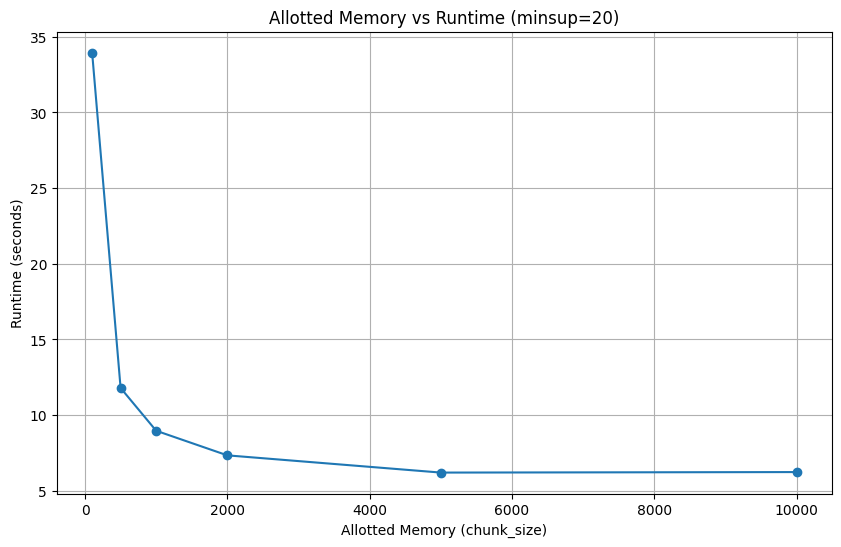

In [32]:
import time
import matplotlib.pyplot as plt

def experiment_memory(file_path, dimensions, measures, chunk_sizes, minsup=50):
    runtimes = []
    for chunk_size in chunk_sizes:
        start = time.time()
        final_cube = buc_p1(file_path, dimensions, measures, chunk_size=chunk_size, minsup=minsup)
        end = time.time()
        runtimes.append(end - start)
        print(f"chunk_size={chunk_size}, runtime={end-start:.2f}s, result_shape={final_cube.shape}")
    return runtimes

# Example usage
chunk_sizes = [100, 500, 1000, 2000, 5000, 10000]  # allotted memory ~ chunk_size
fixed_minsup = 20

runtimes = experiment_memory(file_path, dimensions, measures, chunk_sizes, minsup=fixed_minsup)

# Plot
plt.figure(figsize=(10,6))
plt.plot(chunk_sizes, runtimes, marker='o')
plt.xlabel("Allotted Memory (chunk_size)")
plt.ylabel("Runtime (seconds)")
plt.title(f"Allotted Memory vs Runtime (minsup={fixed_minsup})")
plt.grid(True)
plt.show()


## Optimization Technique

In [41]:
def iceberg_buc(file_path, dimensions, measures, minsup=1, agg_func='sum', chunk_size=1000, output_dir='buc_iceberg_temp'):
    os.makedirs(output_dir, exist_ok=True)

    if len(dimensions) == 0:
        agg_results = None
        count_total = 0
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            count_total += len(chunk)
            agg = chunk[measures].agg(agg_func)
            if agg_results is None:
                agg_results = agg
            else:
                agg_results += agg
        if count_total < minsup:
            return pd.DataFrame()
        df = pd.DataFrame([agg_results])
        df['Frequency'] = count_total
        return df

    dim = dimensions[0]
    remaining_dims = dimensions[1:]

    chunk_agg_files = []

    for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):
        grouped = chunk.groupby(dim, dropna=False)
        agg_chunk = grouped[measures].agg(agg_func)
        counts = grouped.size().rename('Frequency')  # rename to Frequency
        agg_chunk = agg_chunk.join(counts)
        agg_chunk = agg_chunk[agg_chunk['Frequency'] >= minsup].reset_index()

        if not agg_chunk.empty:
            temp_file = os.path.join(output_dir, f"chunk_{dim}_{i}.csv")
            agg_chunk.to_csv(temp_file, index=False)
            chunk_agg_files.append(temp_file)

    merged = None
    for f in chunk_agg_files:
        df_part = pd.read_csv(f)
        if merged is None:
            merged = df_part
        else:
            merged = pd.concat([merged, df_part])
        os.remove(f)

    if merged is None or merged.empty:
        return pd.DataFrame()

    # Group and aggregate again after merging
    merged = merged.groupby(dim, dropna=False).agg({**{m: agg_func for m in measures}, 'Frequency': 'sum'}).reset_index()

    # Final minsup pruning
    merged = merged[merged['Frequency'] >= minsup]

    if merged.empty:
        return pd.DataFrame()

    results = []

    for val in merged[dim].unique():
        sub_df = pd.DataFrame()
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            filtered_chunk = chunk[chunk[dim] == val]
            if not filtered_chunk.empty:
                sub_df = pd.concat([sub_df, filtered_chunk])

        if len(sub_df) < minsup:
            continue  # PRUNE via Apriori!

        temp_file = os.path.join(output_dir, f"sub_{dim}_{val}.csv")
        sub_df.to_csv(temp_file, index=False)

        sub_cube = iceberg_buc(temp_file, remaining_dims, measures, minsup, agg_func, chunk_size, output_dir)
        if not sub_cube.empty:
            sub_cube[dim] = val
            results.append(sub_cube)

        os.remove(temp_file)

    # Compute 'ALL' case
    all_df = pd.read_csv(file_path)
    if len(all_df) >= minsup:
        all_file = os.path.join(output_dir, f"all_{dim}.csv")
        all_df.to_csv(all_file, index=False)
        all_cube = iceberg_buc(all_file, remaining_dims, measures, minsup, agg_func, chunk_size, output_dir)
        if not all_cube.empty:
            all_cube[dim] = 'ALL'
            results.append(all_cube)
        os.remove(all_file)

    if results:
        final_df = pd.concat(results, ignore_index=True)
        return final_df
    else:
        return pd.DataFrame()

file_path = "M25_DA_A2_Part2.csv"
dimensions = ["Subscription_Tier", "Subscription_Length", "Discount_Level"]
measures = ["Budget", "Clicks", "Conversions", "Revenue_Generated", "Units_Sold", "Customer_Satisfaction_Post_Refund"]
minsup=20
cube_df=iceberg_buc(file_path, dimensions,measures, minsup)


cube_df.to_csv('buc_iceberg_results.csv', index=False)
print(f"Final cube shape: {cube_df.shape}")

print("Saved the result to buc_iceberg_results.csv")


Final cube shape: (171, 10)
Saved the result to buc_iceberg_results.csv
